In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Về tệp này
#### Gợi ý chỉnh sửa

Dựa trên dữ liệu mẫu được cung cấp, mỗi hàng trong tập dữ liệu đại diện cho một giao dịch cụ thể được thực hiện bởi một khách hàng. Các cột cung cấp thông tin về sản phẩm đã được mua, số lượng của từng sản phẩm, ngày và giờ của giao dịch, giá của từng sản phẩm, mã định danh duy nhất của khách hàng thực hiện giao dịch và quốc gia nơi khách hàng đang sinh sống.

Ví dụ, trong hàng đầu tiên của dữ liệu mẫu, khách hàng đã mua một sản phẩm có StockCode là "85123A", được mô tả là "WHITE HANGING HEART T-LIGHT HOLDER". Khách hàng đã mua sáu sản phẩm này với đơn giá 2.55, dẫn đến tổng giá trị giao dịch là 15.30. Giao dịch diễn ra vào ngày 1 tháng 12 năm 2010, lúc 8:26, và khách hàng có mã định danh "17850", sống tại Vương quốc Anh.

Loại thông tin này có thể được sử dụng để thu thập thông tin chi tiết về hành vi và sở thích của khách hàng, phân tích xu hướng bán hàng, xác định các sản phẩm phổ biến cũng như tối ưu hóa chiến lược giá và tiếp thị.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


* StockCode : Mã dùng để xác định sản phẩm đã được mua
* Description : Mô tả ngắn gọn về sản phẩm đã được mua
* Quantity : Số lượng sản phẩm đã được mua
* InvoiceDate : Ngày và giờ thực hiện giao dịch mua hàng
* UnitPrice : Giá của một đơn vị sản phẩm đã được mua
* CustomerID : Mã định danh duy nhất của khách hàng đã thực hiện giao dịch mua hàng
* Country : Quốc gia nơi khách hàng thực hiện giao dịch mua hàng

In [4]:
df.InvoiceDate=pd.to_datetime(df.InvoiceDate)

In [5]:
df.shape

(541909, 8)

In [6]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [7]:
df[df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom


In [8]:
df[df.Description.notnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
df.loc[df.Description.isnull(),'Description']= 'None'

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,541909,541909.000000,541909,541909.000000,541909.000000,541909
unique,25900,4070,4224,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.518434,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,14367.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15287.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16255.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [12]:
df['Money']=df.Quantity * df.UnitPrice

In [13]:
a=df.groupby('InvoiceNo')['Money'].sum().reset_index().sort_values('Money',ascending=False).head(10)
a

,InvoiceNo,Money
22025,581483,168469.60
2303,541431,77183.60
18776,574941,52940.94
19468,576365,50653.91
9741,556444,38970.00
15046,567423,31698.16
9951,556917,22775.93
17393,572209,22206.00
15038,567381,22104.80
13240,563614,21880.44


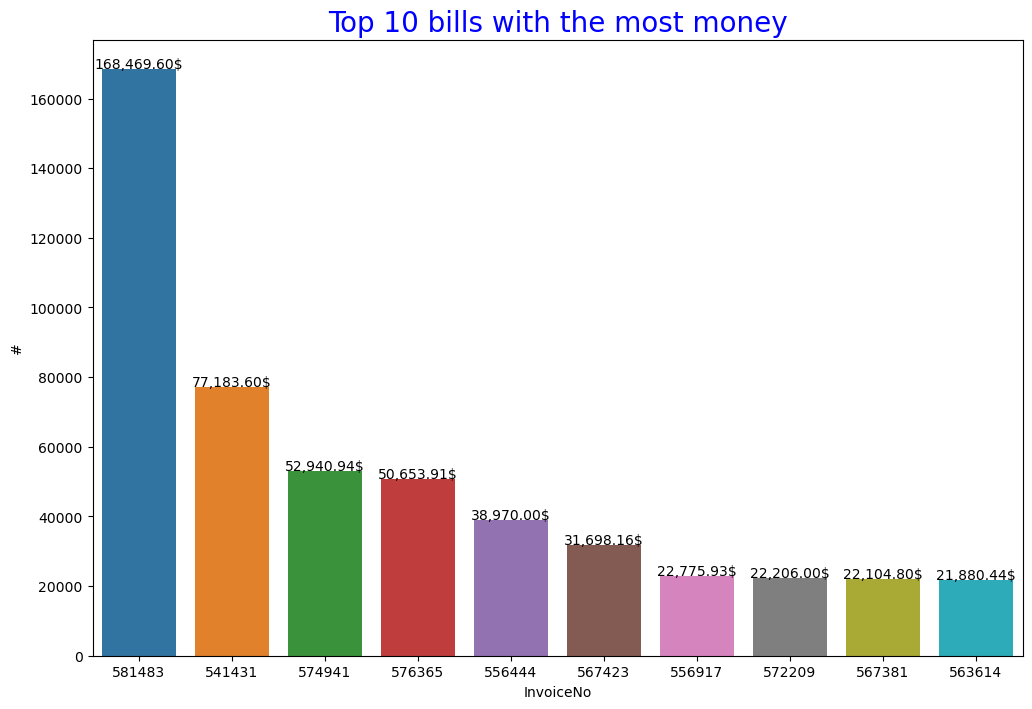

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=a,
    x='InvoiceNo',
    y='Money'
)
plt.title('Top 10 bills with the most money',fontsize=20,color='b')
plt.xlabel('InvoiceNo')
plt.ylabel('#')
for i in range(len(a)):
    plt.text(
        x=i, 
        y=a["Money"].iloc[i] + 150,  
        s=f"{a['Money'].iloc[i]:,.2f}$", 
        ha="center", 
        fontsize=10,
        color="black"
    )

plt.show()

In [15]:
b=df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False).head(10)
b

,StockCode,Quantity
1147,22197,56450
2997,84077,53847
3515,85099B,47363
3536,85123A,38830
3305,84879,36221
454,21212,36039
1982,23084,30646
1412,22492,26437
1530,22616,26315
966,21977,24753


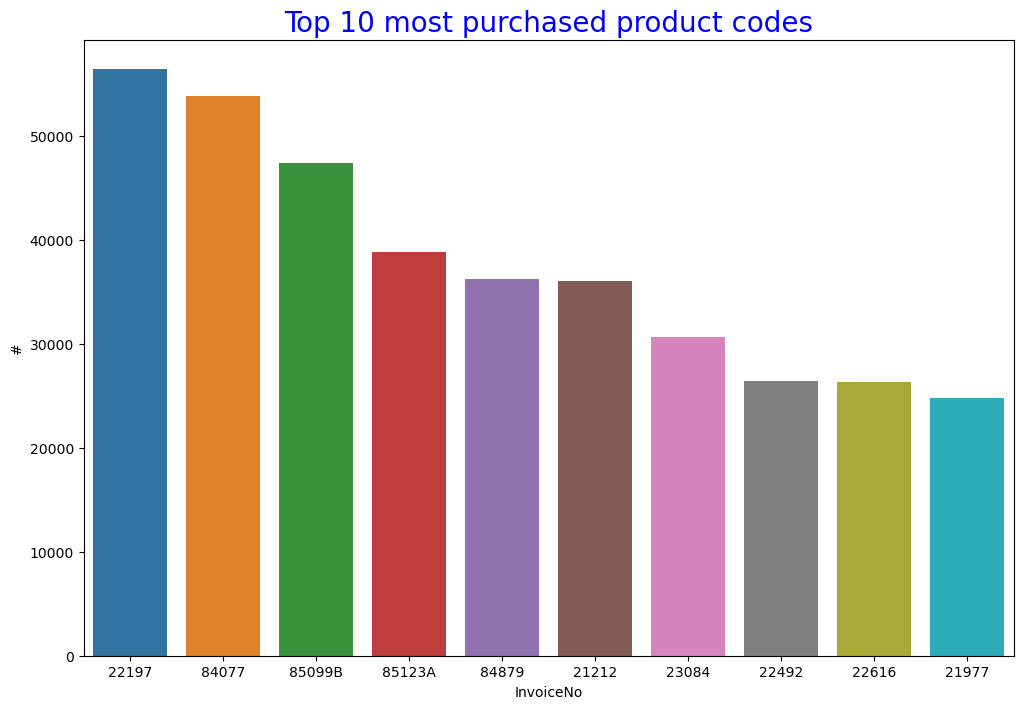

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=b,
    x='StockCode',
    y='Quantity'
)
plt.title('Top 10 most purchased product codes',fontsize=20,color='b')
plt.xlabel('InvoiceNo')
plt.ylabel('#')
plt.show()